In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train.shape

(1460, 81)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# Filling Nan Values in Train dataset
train.set_index('Id', inplace=True)
train['LotFrontage'].fillna(value= train['1stFlrSF']*0.075, inplace= True)
train['GarageYrBlt'].fillna(value= train['YearBuilt'], inplace=True)
train['FireplaceQu'].fillna(value='None', inplace=True)
train['GarageQual'].fillna(value= 'None', inplace= True)
train['GarageCond'].fillna(value='None', inplace= True)
train['GarageType'].fillna(value='None', inplace=True)
train['GarageFinish'].fillna(value='None', inplace=True)
train['MasVnrArea'].fillna(value=0, inplace= True)
train['MasVnrType'].fillna(value='None', inplace= True)
train['Electrical'].fillna(value='SBrkr', inplace= True)
train['BsmtQual'].fillna(value='None', inplace= True)
train['BsmtCond'].fillna(value='None', inplace= True)
train['BsmtExposure'].fillna(value='None', inplace= True)
train['BsmtFinType1'].fillna(value='None', inplace= True)
train['BsmtFinType2'].fillna(value='None', inplace= True)

train['MiscFeature'].fillna(value='None', inplace= True)

In [8]:
# Dropping unuseful columns (mostly nan values) in train dataset
# train.drop('Alley', axis= 1,inplace=True)
# train.drop('PoolQC', axis=1, inplace=True)
# train.drop('MiscFeature', axis=1, inplace =True)
# train.drop('Fence', axis=1, inplace=True)
# train.drop('Utilities', axis=1, inplace=True)

train.drop(['PoolQC'],axis=1, inplace=True)
train.drop(['Utilities'],axis=1, inplace=True)
train.drop(['EnclosedPorch'],axis=1, inplace=True)
train.drop(['MiscFeature'],axis=1, inplace=True)
train.drop(['Alley'],axis=1, inplace=True)
train.drop(['GarageYrBlt'],axis=1, inplace=True)
train.drop(['MoSold'],axis=1, inplace=True)
train.drop(['ScreenPorch'],axis=1, inplace=True)
train.drop(['3SsnPorch'],axis=1, inplace=True)
train.drop(['OpenPorchSF'],axis=1, inplace=True)
train.drop(['WoodDeckSF'],axis=1, inplace=True)
train.drop(['Neighborhood'],axis=1, inplace=True)
train.drop(['YearBuilt'],axis=1, inplace=True)
train.drop(['GarageArea'],axis=1, inplace=True)
train.drop(['Fence'],axis=1, inplace=True)


In [9]:
obj_train = train.select_dtypes(include =['object'])

In [10]:
dum_train = pd.get_dummies(train)

In [11]:
# Filling Nan Values in Test dataset

test.set_index('Id', inplace=True)

test['LotFrontage'].fillna(value= test['1stFlrSF']*0.075, inplace= True)
test['GarageYrBlt'].fillna(value= test['YearBuilt'], inplace=True)
test['FireplaceQu'].fillna(value='None', inplace=True)
test['GarageQual'].fillna(value= 'None', inplace= True)
test['GarageCond'].fillna(value='None', inplace= True)
test['GarageType'].fillna(value='None', inplace=True)
test['GarageFinish'].fillna(value='None', inplace=True)
test['MasVnrArea'].fillna(value=0, inplace= True)
test['MasVnrType'].fillna(value='None', inplace= True)
test['Electrical'].fillna(value='SBrkr', inplace= True)
test['BsmtQual'].fillna(value='None', inplace= True)
test['BsmtCond'].fillna(value='None', inplace= True)
test['BsmtExposure'].fillna(value='None', inplace= True)
test['BsmtFinType1'].fillna(value='None', inplace= True)
test['BsmtFinType2'].fillna(value='None', inplace= True)
test['MSZoning'].fillna(value= 'RL', inplace= True)      # test['MSZoning'].mode()
test['Exterior1st'].fillna(value= 'VinylSd', inplace= True)  # test['Exterior1st'].mode()
test['Exterior2nd'].fillna(value= 'VinylSd', inplace= True)   # test['Exterior2nd'].mode()
test['SaleType'].fillna(value= 'WD', inplace= True)
test['KitchenQual'].fillna(value= 'TA', inplace= True)
test['Functional'].fillna(value= 'Typ', inplace= True)

In [12]:
# Dropping unuseful columns (mostly nan values) in test dataset

test.drop(['PoolQC'],axis=1, inplace=True)
test.drop(['Utilities'],axis=1, inplace=True)
test.drop(['EnclosedPorch'],axis=1, inplace=True)
test.drop(['MiscFeature'],axis=1, inplace=True)
test.drop(['Alley'],axis=1, inplace=True)
test.drop(['GarageYrBlt'],axis=1, inplace=True)
test.drop(['MoSold'],axis=1, inplace=True)
test.drop(['ScreenPorch'],axis=1, inplace=True)
test.drop(['3SsnPorch'],axis=1, inplace=True)
test.drop(['OpenPorchSF'],axis=1, inplace=True)
test.drop(['WoodDeckSF'],axis=1, inplace=True)
test.drop(['Neighborhood'],axis=1, inplace=True)
test.drop(['YearBuilt'],axis=1, inplace=True)
test.drop(['GarageArea'],axis=1, inplace=True)
test.drop(['Fence'],axis=1, inplace=True)

In [13]:
corr = train.corr()
corr.style.background_gradient(cmap='BrBG').set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MiscVal,YrSold,SalePrice
MSSubClass,1,-0.35,-0.14,0.033,-0.059,0.041,0.024,-0.07,-0.066,-0.14,-0.24,-0.25,0.31,0.046,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.04,-0.046,-0.04,0.0083,-0.0077,-0.021,-0.084
LotFrontage,-0.35,1,0.37,0.23,-0.049,0.063,0.19,0.26,0.09,0.13,0.44,0.55,0.0092,0.015,0.42,0.14,0.012,0.22,0.018,0.23,0.0011,0.34,0.32,0.28,0.17,0.015,-0.0025,0.36
LotArea,-0.14,0.37,1,0.11,-0.0056,0.014,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,0.15,0.078,0.038,-0.014,0.26
OverallQual,0.033,0.23,0.11,1,-0.092,0.55,0.41,0.24,-0.059,0.31,0.54,0.48,0.3,-0.03,0.59,0.11,-0.04,0.55,0.27,0.1,-0.18,0.43,0.4,0.6,0.065,-0.031,-0.027,0.79
OverallCond,-0.059,-0.049,-0.0056,-0.092,1,0.074,-0.13,-0.046,0.04,-0.14,-0.17,-0.14,0.029,0.025,-0.08,-0.055,0.12,-0.19,-0.061,0.013,-0.087,-0.058,-0.024,-0.19,-0.002,0.069,0.044,-0.078
YearRemodAdd,0.041,0.063,0.014,0.55,0.074,1,0.18,0.13,-0.068,0.18,0.29,0.24,0.14,-0.062,0.29,0.12,-0.012,0.44,0.18,-0.041,-0.15,0.19,0.11,0.42,0.0058,-0.01,0.036,0.51
MasVnrArea,0.024,0.19,0.1,0.41,-0.13,0.18,1,0.26,-0.071,0.11,0.36,0.34,0.17,-0.069,0.39,0.083,0.027,0.27,0.2,0.1,-0.038,0.28,0.25,0.36,0.012,-0.03,-0.0083,0.47
BsmtFinSF1,-0.07,0.26,0.21,0.24,-0.046,0.13,0.26,1,-0.05,-0.5,0.52,0.45,-0.14,-0.065,0.21,0.65,0.067,0.059,0.0043,-0.11,-0.081,0.044,0.26,0.22,0.14,0.0036,0.014,0.39
BsmtFinSF2,-0.066,0.09,0.11,-0.059,0.04,-0.068,-0.071,-0.05,1,-0.21,0.1,0.097,-0.099,0.015,-0.0096,0.16,0.071,-0.076,-0.032,-0.016,-0.041,-0.035,0.047,-0.038,0.042,0.0049,0.032,-0.011
BsmtUnfSF,-0.14,0.13,-0.0026,0.31,-0.14,0.18,0.11,-0.5,-0.21,1,0.42,0.32,0.0045,0.028,0.24,-0.42,-0.096,0.29,-0.041,0.17,0.03,0.25,0.052,0.21,-0.035,-0.024,-0.041,0.21


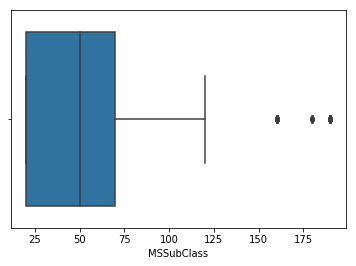

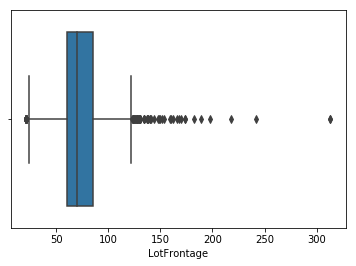

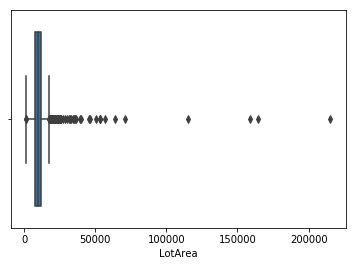

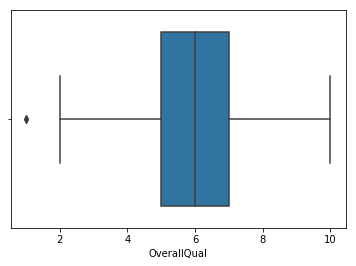

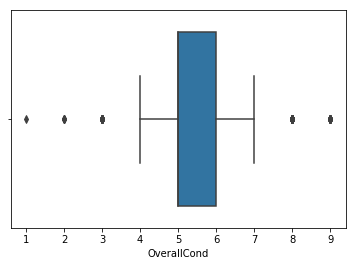

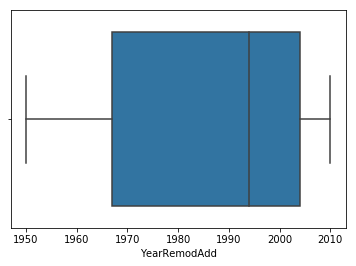

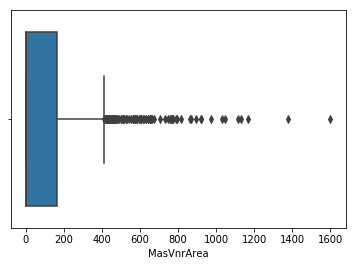

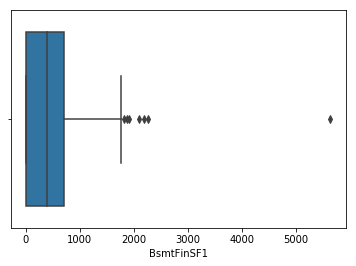

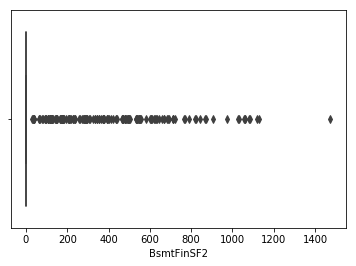

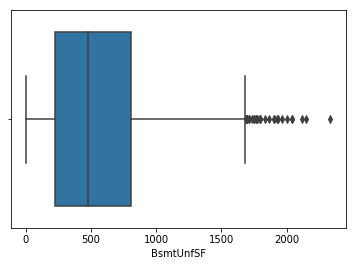

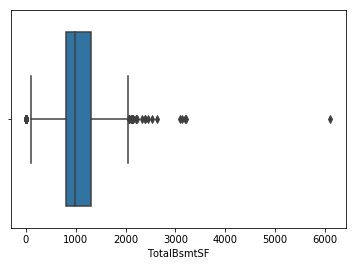

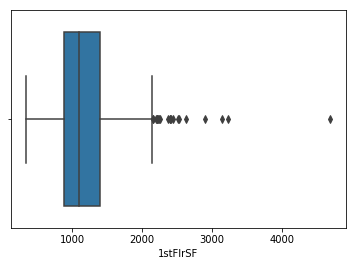

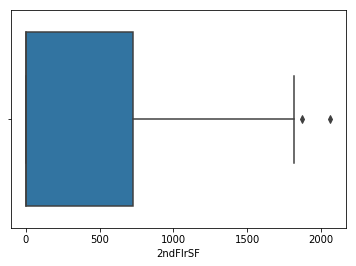

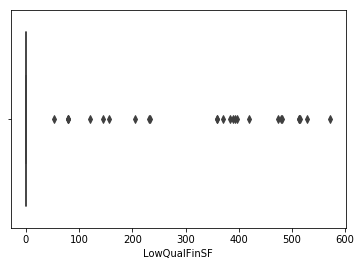

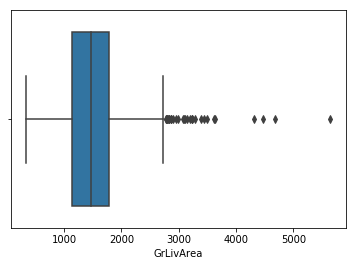

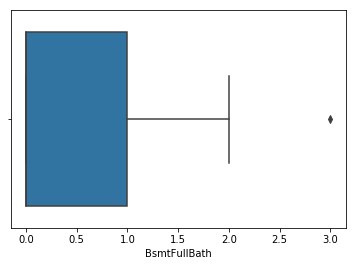

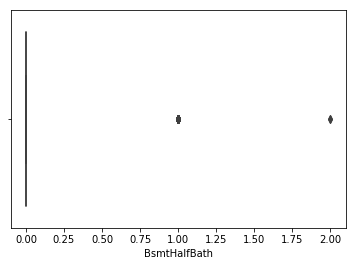

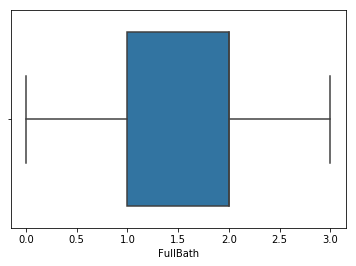

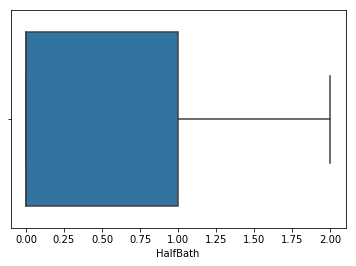

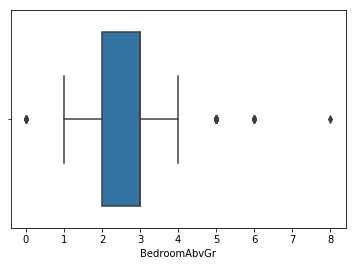

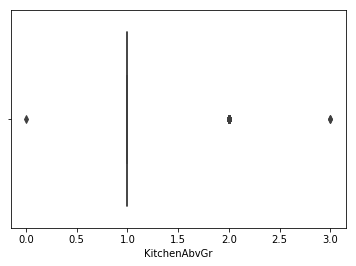

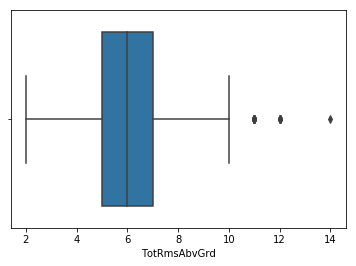

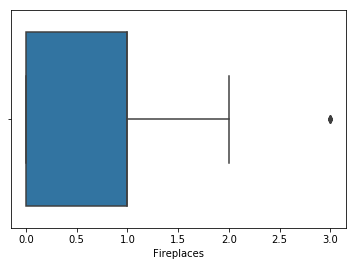

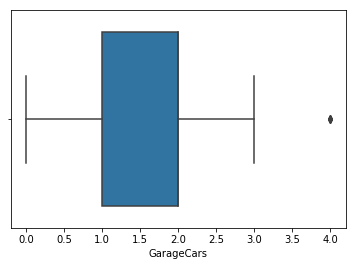

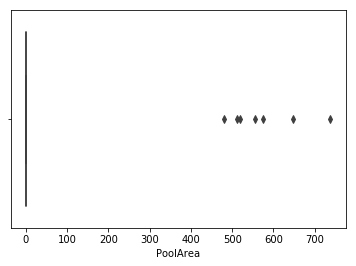

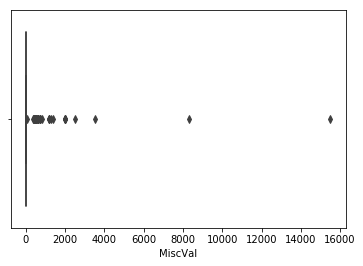

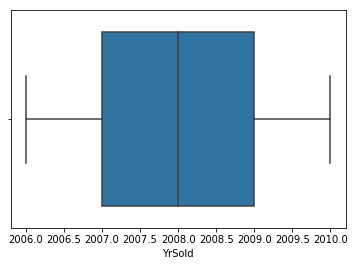

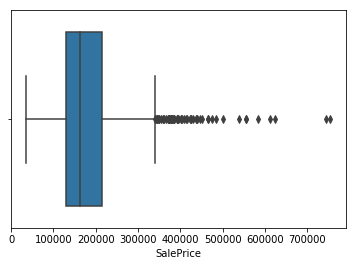

In [14]:
# plot to visualize Outliers
for i in train.select_dtypes([np.number]).columns.tolist():
    sns.boxplot(train[i])
    plt.show()

In [15]:
for i in test.select_dtypes([np.number]).columns.tolist():
    if test[i].isna().sum()>0:
             test[i].fillna(value= test[i].mean(), inplace= True)

In [16]:
obj_test = test.select_dtypes(include =['object'])
dum_test = pd.get_dummies(test)

In [18]:
# Delete the outliers

list_of_features =[ 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'MSSubClass',
                              'BsmtFullBath','BsmtFullBath','GrLivArea', '2ndFlrSF', 'MiscVal']

for k in list_of_features:
    train.drop(axis = 0, index = train[np.abs(stats.zscore(train[k]))>3.2].index.tolist(), inplace = True)

In [19]:
x_test = test.copy()
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [20]:
label = LabelEncoder()
for i in x.select_dtypes(exclude= [np.number]).columns.tolist():
    label.fit(x[i])
    x[i] = label.transform(x[i])
    label.fit(x_test[i])
    x_test[i] = label.transform(x_test[i])

In [21]:
# model = xgb.XGBRegressor(colsample_bytree=0.75, seed = 0, gamma=0.045, learning_rate=0.05, max_depth=7,min_child_weight=1.5,
#                              n_estimators=500, reg_alpha=0.65, reg_lambda=0.45, subsample=0.8)
# model.fit(x,y)

In [22]:
# model = xgb.XGBRegressor(colsample_bytree=0.75, seed = 0, gamma=0.045, learning_rate=0.02, max_depth=7,min_child_weight=1.5,
#                              n_estimators=500, reg_alpha=0.65, reg_lambda=0.45, subsample=0.8)
# model.fit(x,y)

In [23]:
model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3000,
                                     max_depth=4, min_child_weight=0,
                                     gamma=0, subsample=0.6,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
model.fit(x,y)

C:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:40:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=0, missing=None, n_estimators=3000,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.6, verbosity=1)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1,
#            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)
# model.fit(x, y)

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
# model.fit(x, y)

In [24]:
pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), 
                     "SalePrice":model.predict(x_test)}).set_index('Id').to_csv('kaggle_house_prices.csv')